In [45]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [239]:
df = pd.read_excel(r'H:\data\fi_pca.xlsx',sheet_name='data2', index_col=0)
df = df.dropna()
df_standardized = df.apply(stats.zscore)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(df_standardized)
factor_loading = pca.components_
df_factor_loading = pd.DataFrame(factor_loading)


variance_percent_df = pd.DataFrame(data=pca.explained_variance_)
variance_ratio_df = pd.DataFrame(data=pca.explained_variance_ratio_)
variance_ratio_df = variance_ratio_df * 100

In [27]:
variance_percent_df

,0
0,6.078179
1,0.826580
2,0.075976
3,0.010902


In [28]:
variance_ratio_df

,0
0,86.748275
1,11.797013
2,1.084341
3,0.155588


In [29]:
df_factor_loading.T

,0,1,2,3
0,0.370539,0.414184,0.515067,0.625845
1,0.377232,0.382809,0.337132,-0.714601
2,0.394680,0.215713,-0.369937,-0.177688
3,0.401255,0.097478,-0.364866,0.234422
4,0.399873,-0.127889,-0.422435,0.086582
5,0.373189,-0.429507,0.024830,-0.003825
6,0.323188,-0.651954,0.414728,-0.060203


## NEW CODE

In [264]:
pd.DataFrame(eigenvectors)

,0,1,2,3,4,5,6
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.377137,-0.014167,0.019217,-0.001353,-0.006493,-0.002693,0.001977
std,0.027006,0.407961,0.407720,0.408246,0.408188,0.408238,0.408243
min,0.323188,-0.651954,-0.422435,-0.714601,-0.737444,-0.755334,-0.678884
25%,0.371864,-0.278698,-0.367401,-0.118945,-0.212138,-0.161697,-0.156866
50%,0.377232,0.097478,0.024830,-0.003825,0.226473,0.122403,0.001076
75%,0.397276,0.299261,0.375930,0.160502,0.266829,0.235472,0.199021
max,0.401255,0.414184,0.515067,0.625845,0.356141,0.466529,0.607337


In [240]:
corr_matrix_array = df.corr()
corr_matrix_array

,US0003m Index,US0012m Index,GT2 Govt,GT3 Govt,GT5 Govt,USGG10YR Index,GT30 Govt
US0003m Index,1.000000,0.987842,0.946674,0.922648,0.840397,0.693829,0.519937
US0012m Index,0.987842,1.000000,0.962380,0.939630,0.864539,0.720483,0.544533
GT2 Govt,0.946674,0.962380,1.000000,0.986614,0.946000,0.815204,0.649030
GT3 Govt,0.922648,0.939630,0.986614,1.000000,0.974498,0.873636,0.723656
GT5 Govt,0.840397,0.864539,0.946000,0.974498,1.000000,0.951932,0.838937
USGG10YR Index,0.693829,0.720483,0.815204,0.873636,0.951932,1.000000,0.962682
GT30 Govt,0.519937,0.544533,0.649030,0.723656,0.838937,0.962682,1.000000


In [260]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix_array)
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(0,7))

# Work out explained proportion 
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])

#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})


,Eigenvalues,Explained proportion
0,6.072379,86.75%
1,0.825791,11.80%
2,0.075904,1.08%
3,0.010891,0.16%
4,0.008832,0.13%
5,0.005534,0.08%
6,0.000669,0.01%


In [242]:
pd.DataFrame(eigenvectors)

,0,1,2,3,4,5,6
0,0.370539,0.414184,0.515067,0.625845,-0.061143,0.174460,0.001076
1,0.377232,0.382809,0.337132,-0.714601,0.271835,-0.047224,0.103515
2,0.394680,0.215713,-0.369937,-0.177688,-0.737444,0.122403,-0.265449
3,0.401255,0.097478,-0.364866,0.234422,0.261822,-0.755334,-0.048283
4,0.399873,-0.127889,-0.422435,0.086582,0.226473,0.466529,0.607337
5,0.373189,-0.429507,0.024830,-0.003825,0.356141,0.296483,-0.678884
6,0.323188,-0.651954,0.414728,-0.060203,-0.363133,-0.276170,0.294528


In [243]:
principal_components = df_standardized.dot(eigenvectors)
principal_components.head()

,0,1,2,3,4,5,6
Dates,,,,,,,
2000-10-06,6.695456,0.777817,0.267966,-0.070544,0.005243,0.038911,0.052653
2000-10-13,6.508365,0.788597,0.339456,-0.053576,-0.025471,0.021317,0.028726
2000-10-20,6.420830,0.862051,0.339642,-0.059784,-0.029731,0.021543,0.043918
2000-10-27,6.538454,0.834353,0.258316,-0.050005,-0.021568,0.032853,0.033791
2000-11-03,6.631405,0.714438,0.271791,-0.045662,-0.013826,0.044461,0.031720


In [246]:
corr_matrix_array

,US0003m Index,US0012m Index,GT2 Govt,GT3 Govt,GT5 Govt,USGG10YR Index,GT30 Govt
US0003m Index,1.000000,0.987842,0.946674,0.922648,0.840397,0.693829,0.519937
US0012m Index,0.987842,1.000000,0.962380,0.939630,0.864539,0.720483,0.544533
GT2 Govt,0.946674,0.962380,1.000000,0.986614,0.946000,0.815204,0.649030
GT3 Govt,0.922648,0.939630,0.986614,1.000000,0.974498,0.873636,0.723656
GT5 Govt,0.840397,0.864539,0.946000,0.974498,1.000000,0.951932,0.838937
USGG10YR Index,0.693829,0.720483,0.815204,0.873636,0.951932,1.000000,0.962682
GT30 Govt,0.519937,0.544533,0.649030,0.723656,0.838937,0.962682,1.000000


In [247]:
#reconstruct correlation matrix
pd.DataFrame(eigenvectors @ np.diag(df_eigval['Eigenvalues']) @ inv(eigenvectors))
#same as transpose in this case
pd.DataFrame(eigenvectors @ np.diag(df_eigval['Eigenvalues']) @ (eigenvectors.T))

,0,1,2,3,4,5,6
0,1.000000,0.987842,0.946674,0.922648,0.840397,0.693829,0.519937
1,0.987842,1.000000,0.962380,0.939630,0.864539,0.720483,0.544533
2,0.946674,0.962380,1.000000,0.986614,0.946000,0.815204,0.649030
3,0.922648,0.939630,0.986614,1.000000,0.974498,0.873636,0.723656
4,0.840397,0.864539,0.946000,0.974498,1.000000,0.951932,0.838937
5,0.693829,0.720483,0.815204,0.873636,0.951932,1.000000,0.962682
6,0.519937,0.544533,0.649030,0.723656,0.838937,0.962682,1.000000


In [248]:
#component loadings - correlation of each item with principal components
component_loadings = pd.DataFrame(eigenvectors @ np.sqrt(np.diag(df_eigval['Eigenvalues'])))

#format dataframe
component_loadings.columns = ['PC' + str(i) for i in range(1, len(df_standardized.columns)+1)]
component_loadings.index = df_standardized.columns

component_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
US0003m Index,0.913090,0.376381,0.141904,0.065314,-0.005746,0.012978,0.000028
US0012m Index,0.929584,0.347870,0.092882,-0.074576,0.025547,-0.003513,0.002677
GT2 Govt,0.972579,0.196025,-0.101920,-0.018544,-0.069306,0.009105,-0.006864
GT3 Govt,0.988780,0.088581,-0.100523,0.024464,0.024606,-0.056188,-0.001249
GT5 Govt,0.985374,-0.116217,-0.116384,0.009036,0.021284,0.034704,0.015706
USGG10YR Index,0.919619,-0.390306,0.006841,-0.000399,0.033471,0.022055,-0.017556
GT30 Govt,0.796406,-0.592450,0.114260,-0.006283,-0.034128,-0.020544,0.007616


In [249]:
#square of each loading represents the proportion of variance (think of it as an statistic) explained by a particular component.
proportion_variance = np.power(pd.DataFrame(eigenvectors @ np.sqrt(np.diag(df_eigval['Eigenvalues']))), 2)

proportion_variance.columns = ['PC' + str(i) for i in range(1, len(df_standardized.columns)+1)]
proportion_variance.index = df_standardized.columns

proportion_variance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
US0003m Index,0.833733,0.141663,0.020137,4.265868e-03,0.000033,0.000168,7.744931e-10
US0012m Index,0.864126,0.121014,0.008627,5.561618e-03,0.000653,0.000012,7.165672e-06
GT2 Govt,0.945909,0.038426,0.010388,3.438664e-04,0.004803,0.000083,4.712083e-05
GT3 Govt,0.977686,0.007847,0.010105,5.985088e-04,0.000605,0.003157,1.558955e-06
GT5 Govt,0.970963,0.013506,0.013545,8.164522e-05,0.000453,0.001204,2.466658e-04
USGG10YR Index,0.845700,0.152339,0.000047,1.593395e-07,0.001120,0.000486,3.082060e-04
GT30 Govt,0.634263,0.350997,0.013055,3.947360e-05,0.001165,0.000422,5.800983e-05


In [250]:
#chin's way of doing step above
pd.DataFrame(np.diag(df_eigval['Eigenvalues']) @ np.power(np.transpose(eigenvectors), 2)).T

,0,1,2,3,4,5,6
0,0.833733,0.141663,0.020137,4.265868e-03,0.000033,0.000168,7.744931e-10
1,0.864126,0.121014,0.008627,5.561618e-03,0.000653,0.000012,7.165672e-06
2,0.945909,0.038426,0.010388,3.438664e-04,0.004803,0.000083,4.712083e-05
3,0.977686,0.007847,0.010105,5.985088e-04,0.000605,0.003157,1.558955e-06
4,0.970963,0.013506,0.013545,8.164522e-05,0.000453,0.001204,2.466658e-04
5,0.845700,0.152339,0.000047,1.593395e-07,0.001120,0.000486,3.082060e-04
6,0.634263,0.350997,0.013055,3.947360e-05,0.001165,0.000422,5.800983e-05


In [251]:
#summing each squared loading down the items (rows) gives you the eigenvalue for each component. 
np.power(pd.DataFrame(eigenvectors @ np.sqrt(np.diag(df_eigval['Eigenvalues']))), 2).sum(0)

0    6.072379
1    0.825791
2    0.075904
3    0.010891
4    0.008832
5    0.005534
6    0.000669
dtype: float64

In [252]:
#If you keep going on adding the squared loadings cumulatively down the components, 
#you find that it sums to 1 or 100%. This is also known as the communality, 
#and in a PCA the communality for each item is equal to the total variance.
np.power(pd.DataFrame(eigenvectors @ np.sqrt(np.diag(df_eigval['Eigenvalues']))), 2).sum(1)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
dtype: float64

Correlation: 0.9196192624118453


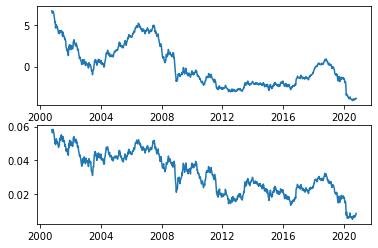

In [301]:
import matplotlib.pyplot as plt

#Test PC1 for Level proxied by 10 year
plt, axs = plt.subplots(2)
axs[0].plot(principal_components[0])
axs[1].plot(df['USGG10YR Index'])
print('Correlation:', df['USGG10YR Index'].corr(principal_components[0]))

Correlation: 0.9063375271286649


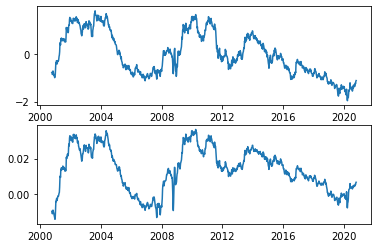

In [302]:
#Test PC2 for slope; PC2 multiplied by -1 bc it's showing 3m-10y

import matplotlib.pyplot as plt
plt, axs = plt.subplots(2)
axs[0].plot(-1*principal_components[1])
axs[1].plot(df['slope'])
print('Correlation:', (df['USGG10YR Index'] - df['US0003m Index']).corr((-1*principal_components[1])))

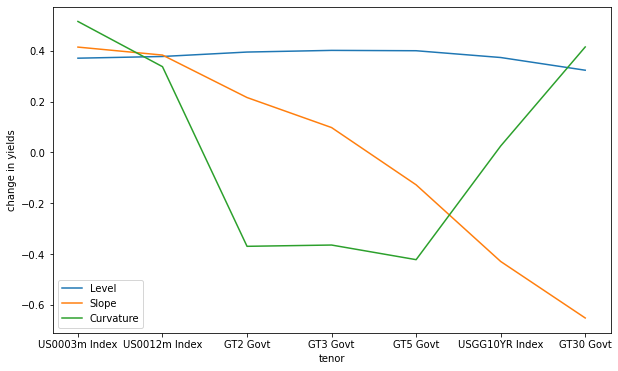

In [329]:
#plot PCs1-3 across tenors

"""With an upward move in rates
(a positive realization of the first PC), the short end of the curve (out to about four
years) steepens and the long end flattens, increasing the hump in the intermediate
sector of the curve. This observation is in agreement with two often-heard
statements: (1) bear-flatteners are more likely than bear-steepeners and (2) the hump
(curvature) of the curve becomes more pronounced when yield levels rise. Similarly,
for a decline in yields (a negative realization of the first PC), bull-steepeners are
more likely than bull-flatteners. These arguments are based on the first component
alone, which, due to its high variance, explains the gross behavior of yield curve
movements.
http://quantlabs.net/academy/download/free_quant_instituitional_books_/[Salomon%20Smith%20Barney]%20Principles%20of%20Principal%20Components%20-%20A%20Fresh%20Look%20at%20Risk,%20Hedging%20and%20Relative%20Value.pdf
"""

import matplotlib.pyplot as plt

eigenvectors_des = pd.DataFrame(eigenvectors)
eigenvectors_des.index = df_standardized.columns

fig, (ax1) = plt.subplots(1,1, figsize=(10,6))

plt.xlabel('tenor')
plt.ylabel('change in yields')

ax1.plot(eigenvectors_des[0], label='Level')
ax1.plot(eigenvectors_des[1], label='Slope')
ax1.plot(eigenvectors_des[2], label='Curvature')
ax1.legend()

In [202]:
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# calculate eigendecomposition
values, vectors = eig(A)
print(values)
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 1.61168440e+01 -1.11684397e+00 -9.75918483e-16]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [205]:
print(A)

print(np.power(A,2))

print(np.power(A.T,2))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[ 1 16 49]
 [ 4 25 64]
 [ 9 36 81]]


In [ ]:
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')